# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Vivek Mehendiratta

EID: vm24395

Name: Archit Patel

EID: ajp4737

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer: 
**Part a)**

The given function is the difference between this estimator's expected value and the true value of the parameter being estimated. For any test point, the mathematical representation means how accurate is the prediction of the estimator for any given data point with respect to the actual value that we are getting from the data generator. This term is the ***bias*** of the estimator since it is saying  how good the estimator is on an average when we are taking any random data point from the predicted values and calculating the difference between the estimated and the average values.  $$Bias[g(x_0)] = E[g(x_0)]-f(x_0)$$

**Part b)**

In layman's terms **Bias** refers to the difference between this estimator's expected value and the true value of the parameter being estimated. A model with high bias will always try to oversimplify the data and produce high errors on both test and training data sets.

**Variance** on the other hand refers to how sensitive the model is to different variations in the data set or alternatively it tells us about the spread of the data. It is the amount that the estimate of the target function will change given different training data.

**Bias - Variance Tradeoff:**

If the model is too simple and has a very few parameters, then it will fail to capture the underlying pattern in the data. This generally happens when we have very less amount of data or we are trying to build a linear model on a non - linear data set. In this case we will say that the model has high bias and low variance, hence it is underfitted.

If we try to train our model with a large number of parameters, then it captures the noise along with the underlying pattern in the data. This generally happens when we train our model a lot on a noisy data set. In this case we say that the model has low bias and high variance, and hence it is overfitted.

Hence to build a good model, it is imperative to find the right balance between bias and variance without overfitting or underfitting the data. By this we are able to minimise the overall error and move towards a region of low bias and low variance,

$$Bias[g(x_0)] = E[g(x_0)]-f(x_0)$$

$$Var[g(x_0)] = E[(g(x_0)-E[g(x_0)])^2]$$

![variance Bias Tradeoff](variance_bias_tradeoff.png)

![Train Test Error](train_test_error.png)

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

## Q2 Part A

In [19]:
def plot_curves(x_train, y_train, x_test, y_test, x_all):
    
    # Fit polynomial models of degrees 2, 4, 7 to the training data. 
    # Print out the mean squared error (on both train and test sets) for all the models. 
    # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

    # YOUR CODE COMES HERE
    # Sorting x_train in ascending for visulation
    indexes = list(range(len(x_train)))
    indexes.sort(key=x_train.__getitem__)
    x_train = np.array(list(map(x_train.__getitem__, indexes)))
    y_train = np.array(list(map(y_train.__getitem__, indexes)))
    
    # Sorting x_test for visualization
    indexes = list(range(len(x_test)))
    indexes.sort(key=x_test.__getitem__)
    x_test = np.array(list(map(x_test.__getitem__, indexes)))
    y_test = np.array(list(map(y_test.__getitem__, indexes)))
    
    # sorting x_all in ascending order
    indexes = list(range(len(x_all)))
    indexes.sort(key=x_all.__getitem__)
    x_all = np.array(list(map(x_all.__getitem__, indexes)))
    x_all = x_all
    
    # Polynomial of 2 degrees
    deg = 2
    x_train_2 = np.vander(np.squeeze(x_train), deg+1)
    x_test_2 = np.vander(np.squeeze(x_test), deg+1)
    x_all_2 = np.vander(np.squeeze(x_all), deg+1)
    lr_2 = LinearRegression()
    lr_2.fit(x_train_2, y_train)
    pred_2 = lr_2.predict(x_test_2)
    train_pred_2 = lr_2.predict(x_train_2)
    mse_2 = mean_squared_error(y_true=y_test, y_pred=pred_2)

    # Polynomial of 4 degrees
    deg = 4
    x_train_4 = np.vander(np.squeeze(x_train), deg+1)
    x_test_4 = np.vander(np.squeeze(x_test), deg+1)
    x_all_4 = np.vander(np.squeeze(x_all), deg+1)
    lr_4 = LinearRegression()
    lr_4.fit(x_train_4, y_train)
    pred_4 = lr_4.predict(x_test_4)
    train_pred_4 = lr_4.predict(x_train_4)
    mse_4 = mean_squared_error(y_true=y_test, y_pred=pred_4)

    # Polynomial of 7 degrees
    deg = 7
    x_train_7 = np.vander(np.squeeze(x_train), deg+1)
    x_test_7 = np.vander(np.squeeze(x_test), deg+1)
    x_all_7 = np.vander(np.squeeze(x_all), deg+1)
    lr_7 = LinearRegression()
    lr_7.fit(x_train_7, y_train)
    pred_7 = lr_7.predict(x_test_7)
    train_pred_7 = lr_7.predict(x_train_7)
    mse_7 = mean_squared_error(y_true=y_test, y_pred=pred_7)
    
    print("MSE score for 2 degree polynomial on train data is ", round(mean_squared_error(y_true=y_train, y_pred=train_pred_2), 2))
    print("MSE score for 2 degree polynomial on test data is ", round(mse_2, 2))
    
    print("MSE score for 4 degree polynomial on train data is ", round(mean_squared_error(y_true=y_train, y_pred=train_pred_4), 2))
    print("MSE score for 4 degree polynomial on test data is ", round(mse_4, 2))
    
    print("MSE score for 7 degree polynomial on train data is ", round(mean_squared_error(y_true=y_train, y_pred=train_pred_7), 2))
    print("MSE score for 7 degree polynomial on test data is ", round(mse_7, 2))
    
    # Predicting values x_all
    pred_all_2 = lr_2.predict(x_all_2)
    pred_all_4 = lr_4.predict(x_all_4)
    pred_all_7 = lr_7.predict(x_all_7)
    
    
    # Ploting the results
    fig, ax = plt.subplots(1, 1, figsize=(12,7))
    ax.scatter(x_train, y_train)
    ax.scatter(x_test, y_test, color = "orange")
    ax.plot(x_all, pred_all_2)
    ax.plot(x_all, pred_all_4)
    ax.plot(x_all, pred_all_7)
    
    ax.plot(x_test, pred_2)
    ax.plot(x_test, pred_4)
    ax.plot(x_test, pred_7)
    ax.set_ylim([-35,35])
    ax.set_xlim([-5,5])
    ax.legend(['2 deg poly prediction on x_all', '4 deg poly prediction on x_all', '7 deg poly prediction on x_all', 
               '2 deg poly prediction on x_test', '4 deg poly prediction on x_test', '7 deg poly prediction on x_test',
              'x_train scatter', 'x_test scatter'])
    
    plt.show()
    return ([
        round(mean_squared_error(y_true=y_train, y_pred=train_pred_2), 2),
        round(mean_squared_error(y_true=y_train, y_pred=train_pred_4), 2),
        round(mean_squared_error(y_true=y_train, y_pred=train_pred_7), 2)
    ],
    [
        round(mean_squared_error(y_true=y_test, y_pred=pred_2),2),
        round(mean_squared_error(y_true=y_test, y_pred=pred_4),2),
        round(mean_squared_error(y_true=y_test, y_pred=pred_7),2)
    ])

MSE score for 2 degree polynomial on train data is  247.3
MSE score for 2 degree polynomial on test data is  320.06
MSE score for 4 degree polynomial on train data is  31.72
MSE score for 4 degree polynomial on test data is  31.29
MSE score for 7 degree polynomial on train data is  30.68
MSE score for 7 degree polynomial on test data is  33.41


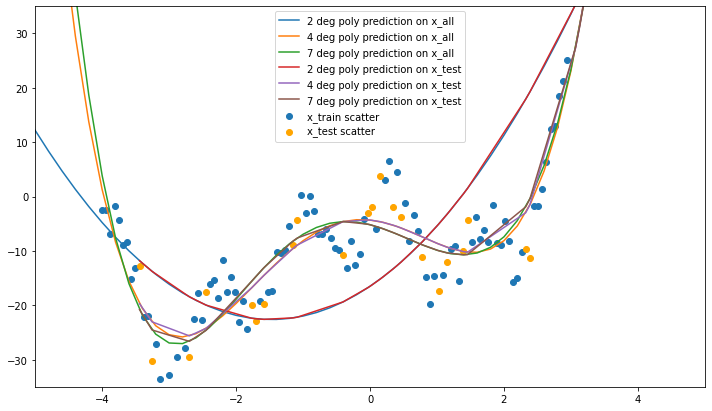

In [20]:
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test, x_all)

## Q2 Part B

| Polynomial | MSE Score on Training data | MSE score on Test data |
| --- | --- | --- |
| 2 degree polynomial (Simple Model) | 247.3 | 320.06 |
| 4 degree polynomial | 31.72 | 31.29 |
| 7 degree polynomial (Complex Model)| 30.68 | 33.41 |

The values of MSE scores for train and test set using simple model or 2 degree polynomial are high leading to high bias and underfitting. As the complexity of the model is increased to 4 degree polynomial, the train and test score decreases and are similar around ~31. The MSE score continues to decrease as the complexity is increased further to 7 degrees whereas the MSE score for test data starts to increase leading to high variance or overfitting situation. 

The right degrees of polynomial should be 4 as the test score is lower as compared to other models.

## Q2 Part C

20% data
MSE score for 2 degree polynomial on train data is  161.17
MSE score for 2 degree polynomial on test data is  402.32
MSE score for 4 degree polynomial on train data is  35.12
MSE score for 4 degree polynomial on test data is  38.34
MSE score for 7 degree polynomial on train data is  22.54
MSE score for 7 degree polynomial on test data is  135.21


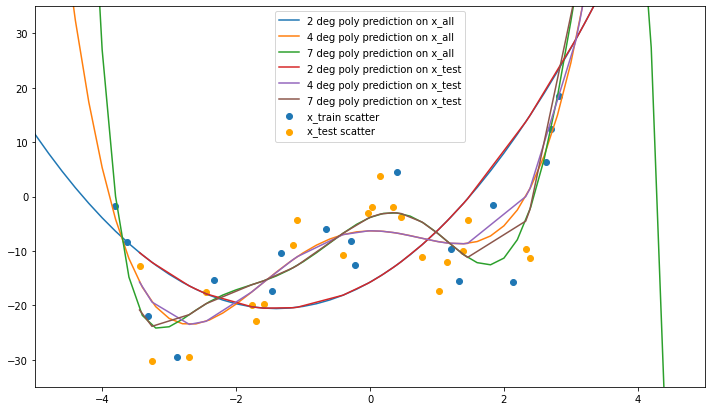

40% data
MSE score for 2 degree polynomial on train data is  150.33
MSE score for 2 degree polynomial on test data is  405.81
MSE score for 4 degree polynomial on train data is  31.62
MSE score for 4 degree polynomial on test data is  33.16
MSE score for 7 degree polynomial on train data is  25.49
MSE score for 7 degree polynomial on test data is  61.24


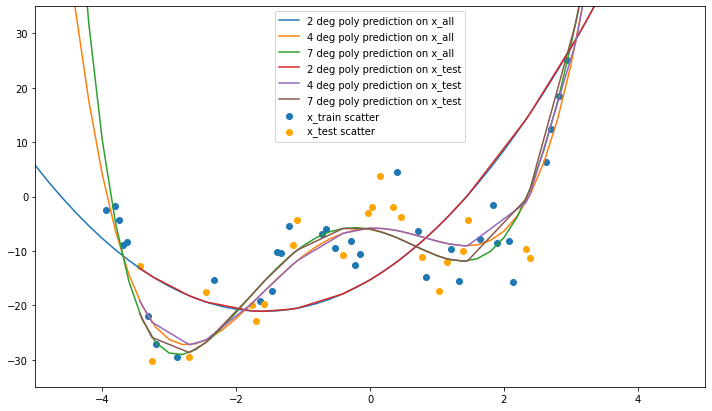

60% data
MSE score for 2 degree polynomial on train data is  150.08
MSE score for 2 degree polynomial on test data is  403.25
MSE score for 4 degree polynomial on train data is  29.19
MSE score for 4 degree polynomial on test data is  31.78
MSE score for 7 degree polynomial on train data is  26.1
MSE score for 7 degree polynomial on test data is  60.17


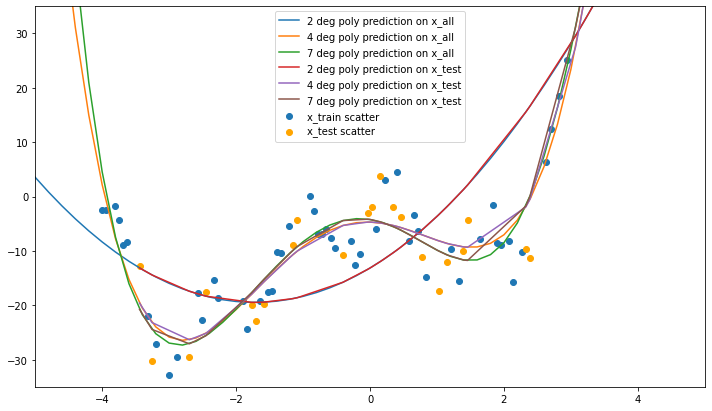

80% data
MSE score for 2 degree polynomial on train data is  168.12
MSE score for 2 degree polynomial on test data is  407.59
MSE score for 4 degree polynomial on train data is  29.31
MSE score for 4 degree polynomial on test data is  32.52
MSE score for 7 degree polynomial on train data is  26.55
MSE score for 7 degree polynomial on test data is  48.08


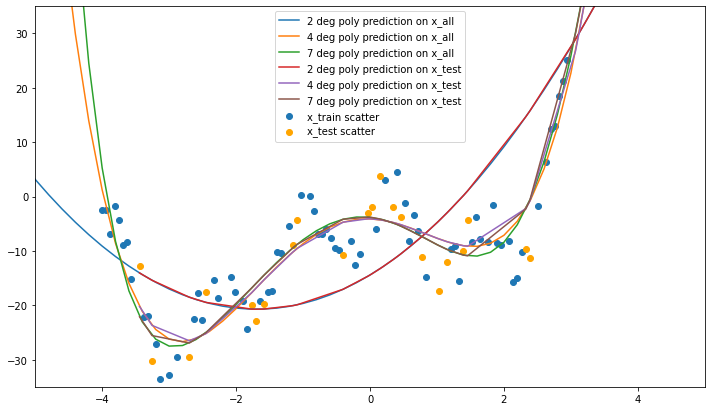

100% data
MSE score for 2 degree polynomial on train data is  247.3
MSE score for 2 degree polynomial on test data is  320.06
MSE score for 4 degree polynomial on train data is  31.72
MSE score for 4 degree polynomial on test data is  31.29
MSE score for 7 degree polynomial on train data is  30.68
MSE score for 7 degree polynomial on test data is  33.41


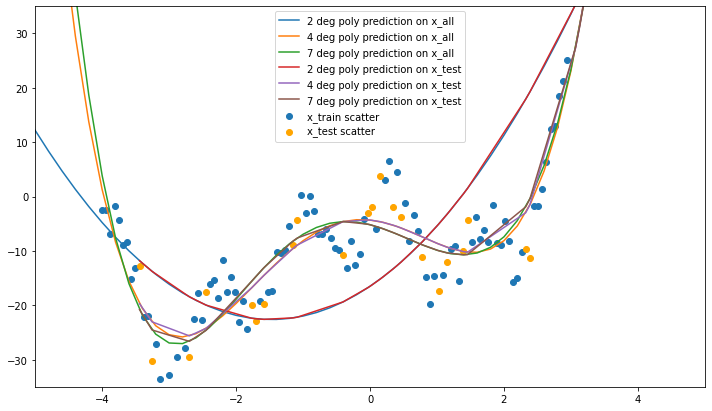

In [21]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test, x_all)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test, x_all)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test, x_all)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test, x_all)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test, x_all)

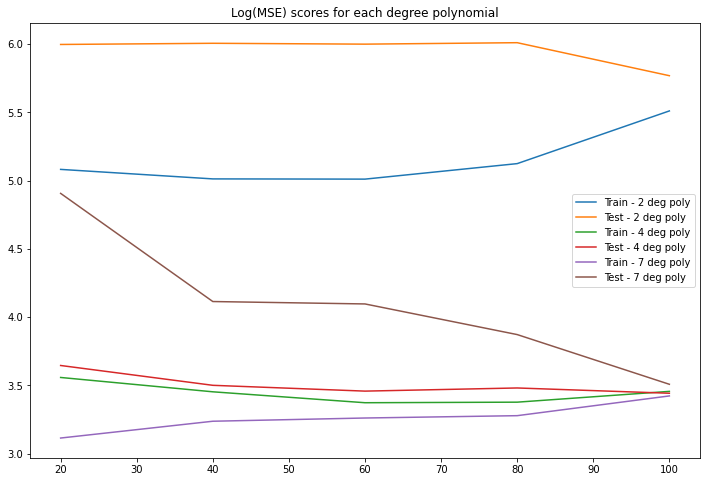

In [5]:
# Ploting the results
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot([20,40,60,80,100], 
list(np.log([train_rmses_20[0], train_rmses_40[0], train_rmses_60[0], train_rmses_80[0], train_rmses_100[0]])))
ax.plot([20,40,60,80,100], 
list(np.log([test_rmses_20[0], test_rmses_40[0], test_rmses_60[0], test_rmses_80[0], test_rmses_100[0]]))
)



ax.plot([20,40,60,80,100], 
list(np.log([train_rmses_20[1], train_rmses_40[1], train_rmses_60[1], train_rmses_80[1], train_rmses_100[1]])))
ax.plot([20,40,60,80,100], 
list(np.log([test_rmses_20[1], test_rmses_40[1], test_rmses_60[1], test_rmses_80[1], test_rmses_100[1]]))
)
ax.title.set_text("Log(MSE) scores for 4 degree polynomial")

ax.plot([20,40,60,80,100], 
list(np.log([train_rmses_20[2], train_rmses_40[2], train_rmses_60[2], train_rmses_80[2], train_rmses_100[2]])))
ax.plot([20,40,60,80,100], 
list(np.log([test_rmses_20[2], test_rmses_40[2], test_rmses_60[2], test_rmses_80[2], test_rmses_100[2]]))
)

ax.legend(['Train - 2 deg poly', 'Test - 2 deg poly',
          'Train - 4 deg poly', 'Test - 4 deg poly',
          'Train - 7 deg poly', 'Test - 7 deg poly'])
ax.title.set_text("Log(MSE) scores for each degree polynomial")

plt.show()

**Log(MSE) for Train - 2 degree polynomial** : Being a simple model, it is not able to infer all the information from the data, thus leading to high log(MSE) score

**Log(MSE) for Test - 2 degree polynomial** : Being a simple model, it was't able capture in much information in train data and prediction on new data (test data) led to even higher log(MSE) score

**Log(MSE) for Train - 7 degree polynomial** : Being a complex model, it inferred most of the information from the training data. For low data, the training log(MSE) score is very low as compared to complete data as most information is inferred. 

**Log(MSE) for Test - 7 degree polynomial** : The complex model inferred most of the information from train data and it is not able to perform well on new data(test data), therefore leading to high test errors.

**Log(MSE) for Train - 4 degree polynomial** : Neither too simple nor too complex model, it inferred the information from the training data appropriately. For low data, the training log(MSE) score is high as compared to complete dataset. 

**Log(MSE) for Test - 4 degree polynomial** : The right model captured a general pattern which was present in test data as well making test error lower as the data is increased.

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

**Part a)**

Both gradient descent and stochastic gradient descent and ways of optimizing a set of parameters of a model in an iterative manner in order to minimize the error functions. Both the models minimize the objective functions in the opposite direction of the gradient of the objective function w.r.t. parameters. Their learning rates determine the size of steps the methods will take to reach a minima. However the key advantages and disadvantages for both  the gradient descent and stochastic gradient descent can be summarised below as:

**Gradient descent:**

Pros:

*   It takes lower oscillations and less noisy steps towards the minima of the loss function because it takes the average of all the training sample rather than a single sample
*   It produces more stable gradient descent convergence and stable error gradient than the SDG

Cons:
*   Depending on computer resources, it can take too long to process all the training samples as a batch
*   Stable gradient can lead to a local minima rather than the global minima of the error function

**Stochastic Gradient Descent:**

Pros:
*   Due to the frequent updates that it takes to reach the minima, the loss function has oscillations which can help it get out of the local minima 
*   For large dataset, it can converge faster as it updates the parameters more frequently

Cons:
*   The steps taken towards the minima can be very noisy and it may lead the gradient descent into another  direction
*   Noisy steps can take longer to converge onto the minima of the loss function



**Part b)**

**Nelder Mead Method:** Nelder Mead method is a method of optimizing a given function by finding it's lowest value. To being with, it samples two random points which are relatively near to each other and just repeatedly takes a step down from the largest value. If we assume a fixed step size here, then the algorhithm won't be able to converge and would spend a lot of time inching towards the minima. To overcome this shortfall, Nelder mead method dynamically changes it's step size based on the new point. If the new point is better than the previous one, then it expands it's step size and if the new point is worse it contracts it's step size to converge around the minima. For one dimensional cases, it works like a galloping search wherein it starts approaching the minima after which it switches to contracting and then does a binary search.

Major challenges:
*   Nelder-Mead method might not perform well with higher dimensional functions. This method gets hampered with models having dozen or more parameters whereas in real world paramenters might range in millions or more 
*   One of the other challenges will be to decide the direction of the step size. While it works well with 2 - dimensional space, the problem arises when we increase the number of dimensions


# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

**Gradient descent**: calculates and updates weight using derivative of loss function using the whole data

**Stochastic gradient descent**: calculates and updates weight using derivative of loss function using single point at a time.

We will derive coefficients update for gradient descent and use it iteratively on single point to perform as SGD.

The following assumptions are made for derivation:

x : Matrix of size $n\times4$ with 4 columns $(1, x_1, x_1x_2, e^{-x_1})$

w : $weight$ vector of size $4\times1$ - $(w_0, w_1, w_2, w_3)$

Estimator of size $n\times1 $: $$h_w(x) = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1}$$
$$h_w(x) = x\times w$$

True values : vector $y$ of size $n\times1$

Loss function : $L = \frac{\sum(h_w(x) - )^2}{2}$

Learning rate : $\alpha$

Weight Updation : $$w^{new}= w^{current} - \alpha\frac{\partial L}{\partial w}$$

$$\frac{\partial L}{\partial w} = \frac{2(h_w(x) - y)}{2}\frac{\partial (h_w(x) - y)}{\partial w}$$

$$\frac{\partial L}{\partial w} = (h_w(x) - y)\frac{\partial h_w(x)}{\partial w}$$

$$\frac{\partial h_w(x)}{\partial w} = \frac{\partial w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1}}{\partial w}$$

$$[\frac{\partial h_w(x)}{\partial w_0}, \frac{\partial h_w(x)}{\partial w_1}, \frac{\partial h_w(x)}{\partial w_2}, \frac{\partial h_w(x)}{\partial w_3}]  = [1, x_1, x_1x_2, e^{-x_1}]$$

$$\frac{\partial h_w(x)}{\partial w} = x$$

$$\frac{\partial L}{\partial w} = (h_w(x) - y)x$$

$$w^{new}= w^{current} - \alpha\times(h_w(x) - y)'\times x$$

$$w^{new}= w^{current} - \alpha\times(x*w - y)'\times x$$

Weight Updation with regularization:

Loss Function : 

$$L = \frac{\sum(h_w(x) - y)^2}{2} + \lambda \times \frac{\sum_{j=1}^{3} w^2_j}{2}$$

$$w^{new}= w^{current} - \alpha\times[(x*w  - y)'\times x + \lambda \times w]$$

When weight is updated iteratively using 1 data point at a time, Gradient Descent becomes SGD

$$w^{new}= w^{current} - \alpha\times(x_i*w - y_i)'\times x_i$$

Regularized SGD: 

$$w^{new}= w^{current} - \alpha\times[(x_i*w - y_i)'\times x_i + \lambda \times w]$$

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [6]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [33]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient
        # = please put your codes here to update the self.coef using SGD
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
#                 error = X[i,:]@self.coef - y[i]
                error = self.linearPredict(X[i,:]) - y[i]
    
                coef_reg = self.coef.copy()
                coef_reg[0] = 0 #intercept weight do not participate in regularization
            
                # Compute gradients
                gradient  = error * X[i,:] + self.regularization*coef_reg 
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        #compute the dot product of self.coef and X
        return np.dot(X, self.coef) #this line is just a placeholder, please delete this line in your code   

In [34]:
data = pd.read_csv('SGD_samples-1.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer:

C:\Users\mehen\AppData\Local\Temp/ipykernel_2260/122548299.py:34: RuntimeWarning: overflow encountered in multiply
  gradient  = error * X[i,:] + self.regularization*coef_reg
C:\Users\mehen\AppData\Local\Temp/ipykernel_2260/122548299.py:17: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate*gradient
C:\Users\mehen\AppData\Local\Temp/ipykernel_2260/122548299.py:41: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
C:\Users\mehen\AppData\Local\Temp/ipykernel_2260/122548299.py:34: RuntimeWarning: invalid value encountered in multiply
  gradient  = error * X[i,:] + self.regularization*coef_reg
C:\Users\mehen\AppData\Local\Temp/ipykernel_2260/122548299.py:17: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - self.learning_rate*gradient


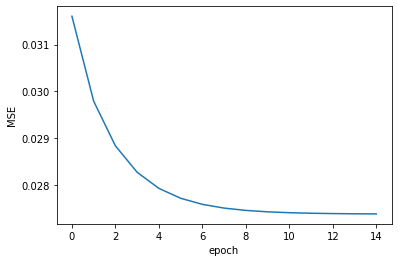

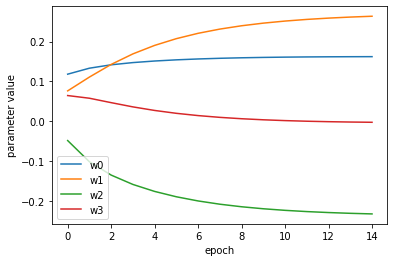

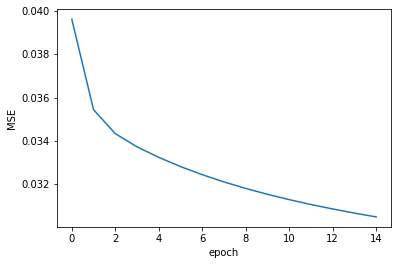

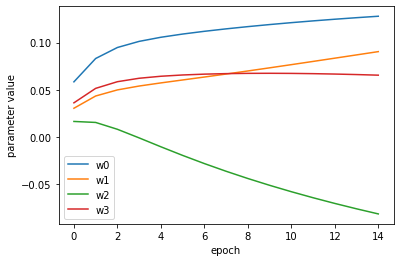

In [35]:
result = []
for alpha in learning_rate:
    for pen in regularization:
        reg = Regression(learning_rate=alpha, regularization=pen, n_epoch=n_epochs)
        reg.fit(X,y)
        result.append((alpha, pen, reg.lowest_mse))

best_comb = sorted(result, key=lambda elem: elem[2])[0:2]

reg = Regression(learning_rate=best_comb[0][0], regularization=best_comb[0][1], n_epoch=n_epochs)
reg.fit(X,y, plot=True)

reg = Regression(learning_rate=best_comb[1][0], regularization=best_comb[1][1], n_epoch=n_epochs)
reg.fit(X,y, plot=True)

In [36]:
print("Best Parameter")
print("Lowest MSE score of",best_comb[0][2],"is achieved at learning rate",best_comb[0][0],"and regularization penalty",best_comb[0][1])

print("\nSecond Best Parameter")
print("Lowest MSE score of",best_comb[1][2],"is achieved at learning rate",best_comb[1][0],"and regularization penalty",best_comb[1][1])

Best Parameter
Lowest MSE score of 0.02739108757520101 is achieved at learning rate 0.01 and regularization penalty 0

Second Best Parameter
Lowest MSE score of 0.03049599152007352 is achieved at learning rate 0.001 and regularization penalty 0


In [37]:
a = np.array([1,2,3,4])

In [17]:
a[0] = 0

In [18]:
a

array([0, 2, 3, 4])